# "Analisis Pertumbuhan Penderita ADHD"
---
Muhamad Aditya Darmawan  (217006021)  
Ali Astra Mikaila  (217006103)  
Kelompok A-One / Rekayasa Data

---
# Import Library


In [1]:
import pandas as pd

#Data Analysis
import re
import nltk
# Ensure that the necessary NLTK datasets are downloaded
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



#Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\darma\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\darma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\darma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\darma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Load Dataset**

In [2]:
# load data
data = pd.read_csv("ADHD.csv")

# Display the first few rows of the dataset
data.head()

C:\Users\darma\AppData\Local\Temp\ipykernel_5920\3581397339.py:2: DtypeWarning: Columns (2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("ADHD.csv")


,title,selftext,score,id,url,num_comments,created_utc,created_datetime
0,Android app to strengthen attention/focus,"Hey /r/ADHD,\n\nCheck out my simple Android ap...",6,k348a,https://www.reddit.com/r/ADHD/comments/k348a/a...,7.0,1315014480.0,2011-09-03 01:48:00
1,Does anyone here have experience with Imipramine?,My doctor has suggested it for ADD with anxiet...,4,k3gdz,https://www.reddit.com/r/ADHD/comments/k3gdz/d...,1.0,1315051084.0,2011-09-03 11:58:04
2,"New study shows that for people with ADHD, \n""...",NaN,22,k4q79,http://www.utexas.edu/features/2011/08/29/adhd...,11.0,1315174374.0,2011-09-04 22:12:54
3,What does the ADHD test look like?,I'm 21 and didn't know about ADHD until recent...,6,k5fvd,https://www.reddit.com/r/ADHD/comments/k5fvd/w...,10.0,1315239683.0,2011-09-05 16:21:23
4,Are you guys good with maps and directions?,It seems like one thing I've always been reall...,0,k6efi,https://www.reddit.com/r/ADHD/comments/k6efi/a...,0.0,1315317191.0,2011-09-06 13:53:11


# Data Preprocessing

## EDA and Data Cleaning

In [3]:
# melihat tipe data setiap kolom
data.dtypes

title                object
selftext             object
score                object
id                   object
url                  object
num_comments        float64
created_utc          object
created_datetime     object
dtype: object

In [4]:
# Melihat jumlah baris dan kolom
data.shape

(336066, 8)

In [5]:
# Melihat Missing Value
data.isna().sum()

title                  1
selftext            5143
score                 21
id                    21
url                   21
num_comments          21
created_utc           21
created_datetime      30
dtype: int64

In [7]:
# Dilihat kuantatitas value dataframe terlebih dahulu untuk nantinya dibandingkan

num_columns_b = data.shape[1]
num_rows_b = data.shape[0]
print(f"""Dimensi Dataframe Sebelum dibersihkan
Columns = {num_columns_b}
Rows = {num_rows_b}""")

Dimensi Dataframe Sebelum dibersihkan
Columns = 8
Rows = 336066


In [8]:
df_clean = data.dropna()

In [9]:
df_clean.isna().sum()

title               0
selftext            0
score               0
id                  0
url                 0
num_comments        0
created_utc         0
created_datetime    0
dtype: int64

In [10]:
# Drop column yang tidak akan digunakan
data = df_clean.drop(columns = ['id', 'created_utc'])
data.head()

,title,selftext,score,url,num_comments,created_datetime
0,Android app to strengthen attention/focus,"Hey /r/ADHD,\n\nCheck out my simple Android ap...",6,https://www.reddit.com/r/ADHD/comments/k348a/a...,7.0,2011-09-03 01:48:00
1,Does anyone here have experience with Imipramine?,My doctor has suggested it for ADD with anxiet...,4,https://www.reddit.com/r/ADHD/comments/k3gdz/d...,1.0,2011-09-03 11:58:04
3,What does the ADHD test look like?,I'm 21 and didn't know about ADHD until recent...,6,https://www.reddit.com/r/ADHD/comments/k5fvd/w...,10.0,2011-09-05 16:21:23
4,Are you guys good with maps and directions?,It seems like one thing I've always been reall...,0,https://www.reddit.com/r/ADHD/comments/k6efi/a...,0.0,2011-09-06 13:53:11
5,Just started Concerta today any advice/experie...,"I am now 32, I was on Ritalin from the age of ...",7,https://www.reddit.com/r/ADHD/comments/k7t0t/j...,10.0,2011-09-07 17:46:52


In [11]:
# Update column selftext menjadi post
data.rename(columns={'selftext': 'post'}, inplace=True)

In [12]:
# Kalkulasikan jumlah karakter dari column title dan posts
data['len_title'] = data['title'].apply(lambda x: len(x) if pd.notnull(x) else 0)
data['len_post'] = data['post'].apply(lambda x: len(x) if pd.notnull(x) else 0)
data.head()

,title,post,score,url,num_comments,created_datetime,len_title,len_post
0,Android app to strengthen attention/focus,"Hey /r/ADHD,\n\nCheck out my simple Android ap...",6,https://www.reddit.com/r/ADHD/comments/k348a/a...,7.0,2011-09-03 01:48:00,41,988
1,Does anyone here have experience with Imipramine?,My doctor has suggested it for ADD with anxiet...,4,https://www.reddit.com/r/ADHD/comments/k3gdz/d...,1.0,2011-09-03 11:58:04,49,146
3,What does the ADHD test look like?,I'm 21 and didn't know about ADHD until recent...,6,https://www.reddit.com/r/ADHD/comments/k5fvd/w...,10.0,2011-09-05 16:21:23,34,677
4,Are you guys good with maps and directions?,It seems like one thing I've always been reall...,0,https://www.reddit.com/r/ADHD/comments/k6efi/a...,0.0,2011-09-06 13:53:11,44,553
5,Just started Concerta today any advice/experie...,"I am now 32, I was on Ritalin from the age of ...",7,https://www.reddit.com/r/ADHD/comments/k7t0t/j...,10.0,2011-09-07 17:46:52,77,1062


In [13]:
# average title and post length
print(f'''Rata-rata Karakter Kolom Title = {(data['len_title']).mean().round()} characters''')
print(f'''Rata-rata Karakter Kolom Post = {(data['len_post']).mean().round()} characters''')

Rata-rata Karakter Kolom Title = 56.0 characters
Rata-rata Karakter Kolom Post = 532.0 characters


# **Implementasi Stopword Removal dan Lemmatization**

In [15]:
# Fungsi praprocessing text, extract, dan filter POS Tags
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Memisahkan kata kata dengan slash
    text = text.replace('/', ' ')

    # Penetapan dosis obat (contoh: 70mg, 150mg) dan 'tl;dr'
    dosages_and_phrases = re.findall(r'\b\d+mg\b|tl;dr', text)

    # Menghapus special characters kecuali tanda petk, spaso, and penetapan 'tl;dr'
    text = re.sub(r'(?<!tl);(?<!dr)|[^a-zA-Z\s\';]', ' ', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Stopwords removal
    custom_words = ['something', 'im', 'dont', 'thing', 'going', 'getting', 'people',
                    'someone', 'everyone', 'nothing', 'ive', 'id', 'thank', 'thats',
                    'didnt', 'much', 'lot', 'isnt', 'stuff', 'right', 'sure', 'word',
                    'way', 'anything', 'everything', 'others', 'cant', "i'm", "don't",
                    "i've", "i'd", "that's", "didn't", "isn't", "can't", "s", "guy", "wa", "day", "week", "month"]
    stop_words = set(stopwords.words('english'))
    stop_words = stop_words.union(custom_words)
    filtered_tokens = [word for word in lemmatized_tokens if word not in stop_words]

    # POS tagging
    tagged_tokens = pos_tag(filtered_tokens)

    # Filter out tokens that are not relevant
    POS_text = [word for word, tag in tagged_tokens if tag in ['VBG', 'VBN', 'NN', 'NNP', 'NNS', 'NNPS', 'JJ', 'JJR', 'JJS', 'RBR', 'POS']]

    # Reinsert dosages and phrases like 'tl;dr' into the text
    final_tokens = POS_text + dosages_and_phrases

    # Final text
    final_text = ' '.join(final_tokens)
    return final_text

In [16]:
# Preprosess text pada column (Mengasumsikan 'title' dan 'selftext' sebagai column yang relevan)
data['title'] = data['title'].apply(lambda x: preprocess_text(x))
data['post'] = data['post'].apply(lambda x: preprocess_text(x))

# Menampilkan kembali data teratas setelah dilakukan manipulasi
data.head()

,title,post,score,url,num_comments,created_datetime,len_title,len_post
0,android app strengthen attention focus,hey r simple android app attention exercise ht...,6,https://www.reddit.com/r/ADHD/comments/k348a/a...,7.0,2011-09-03 01:48:00,41,988
1,anyone experience imipramine,doctor ha add anxiety issue anyone,4,https://www.reddit.com/r/ADHD/comments/k3gdz/d...,1.0,2011-09-03 11:58:04,49,146
3,doe adhd test look,short found 's web parent think 's condition '...,6,https://www.reddit.com/r/ADHD/comments/k5fvd/w...,10.0,2011-09-05 16:21:23,34,677
4,good map direction,good learning place learning map little car ri...,0,https://www.reddit.com/r/ADHD/comments/k6efi/a...,0.0,2011-09-06 13:53:11,44,553
5,started concerta today experience long time ad...,ritalin age untill tremendous difficulty funct...,7,https://www.reddit.com/r/ADHD/comments/k7t0t/j...,10.0,2011-09-07 17:46:52,77,1062


In [23]:
# Function to check if a cell is exactly 'deleted' or 'removed'
def check_exact_match(cell):
    return cell == '[deleted]' or cell == '[removed]'

columns_to_clean = ['title','post']
count_rows_b = data[data[columns_to_clean].applymap(check_exact_match).any(axis=1)].shape[0]

Number of 'Deleted' or 'Removed' Posts: 0


In [18]:
# Checking setelah data cleaning
num_columns_a = data.shape[1]
num_rows_a = data.shape[0]

print(f"""Dataframe Dimensions After Cleaning
Columns = {num_columns_a}
Rows = {num_rows_a}""")

print(f"""Difference
Rows = {((num_rows_a - num_rows_b)/((num_rows_a+num_rows_b)/2))*100:.2f}%""")

Dataframe Dimensions After Cleaning
Columns = 8
Rows = 330905
Difference
Rows = -1.55%


# **Data Visualization**

## Visualisasi dengan Word Cloud

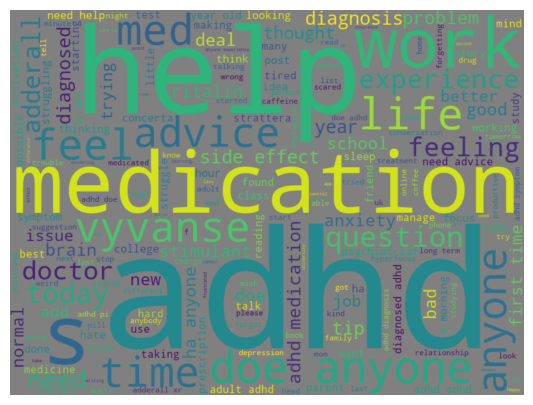

In [19]:
# Visualisasi kolom Title dengan Wordcloud
title_text = " ".join(data['title'].dropna().astype(str))

wordcloud = WordCloud(background_color="gray", width = 800, height = 600).generate(title_text)

# Menampilkan hasil generate wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

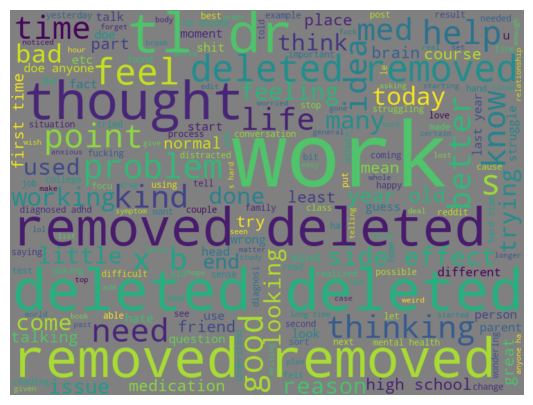

In [20]:
# Visualisasi column selftext atau post dengan Wordcloud
post_text = " ".join(data['post'].dropna().astype(str))

wordcloud = WordCloud(background_color="gray", width = 800, height = 600).generate(post_text)

# Menampilkan hasil generate wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

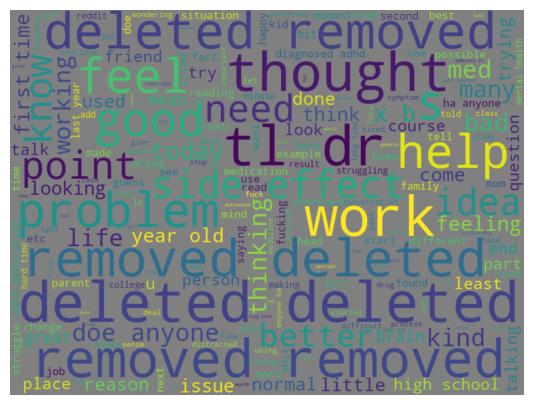

In [21]:
# Visualisasi semua text pada data dengan Wordcloud
all_text = title_text + post_text

wordcloud = WordCloud(background_color="gray", width = 800, height = 600).generate(all_text)

# Menampilkan hasil generate wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
custom_words = ['something', 'im', 'dont', 'thing', 'going', 'getting', 'people',
                    'someone', 'everyone', 'nothing', 'ive', 'id', 'thank', 'thats',
                    'didnt', 'much', 'lot', 'isnt', 'stuff', 'right', 'sure', 'word',
                    'way', 'anything', 'everything', 'others', 'cant', "i'm", "don't",
                    "i've", "i'd", "that's", "didn't", "isn't", "can't", "s", "guy", "wa", "day", "week", "month"]